# Project: Investigate No Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Section 1: Introduction

> The data set selected for this analysis contains over 100k medical patient data from Brazil. The dataset does help us focus on the question of whether patients showed up for thier appointments or not. The dataset provides various characteristics about the patient such as age, gender, neighbourhood, health conditions (diabetes, hypertension, Alcoholism, etc). 

> **Questions To Be Answered**
1. What is the overall appointment of shows versus no shows?
2. Which neighbourhoods have the have the highest number of no shows?
3. Does receiving an sms increase the likelihood of a patient showing up on their appointment date?
4. Do no show appointments happen on certain days of the week?

In [156]:
# Import all packages needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Section 2: Data Wrangling & Cleaning

> In this section of the report, I loaded in the data, checked for cleanliness, trimmed and cleaned the dataset for analysis.

### General Properties

In [157]:
# Load data
url = 'noshowappointments-kagglev2-may-2016.csv'

df = pd.read_csv(url)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [158]:
# Get shape of data
df.shape

(110527, 14)

In [159]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [160]:
# Get a sense of the data types of all columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [161]:
# Check for missing data
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [162]:
# Get a sense of all the columns in the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [163]:
# Check for the number of unique elements in each column of the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [164]:
# View the tail of the dataset
df.tail(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


+ Looking at the result of the data wrangling process, we notice the data frame includes the two types of data:
    + Categorical Data: Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show
    + Quantitative Data: PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay

In [165]:
# Convert all the column names to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [166]:
# check for duplicate data
df.duplicated().sum()

0

In [167]:
#renaming column names with grammatical errors
df.rename(columns={'hipertension': 'hypertension', 'handcap': 'handicap', 'no-show':'no_show'}, inplace=True)

In [168]:
# Confirm changes to column names
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [169]:
# Converting the data type of columns with dates to datetime.
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [170]:
# Confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [171]:
# Create a new column for patient's day of appointment
df['appointment_dow'] = df['appointmentday'].dt.day_name()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [172]:
df.tail()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday


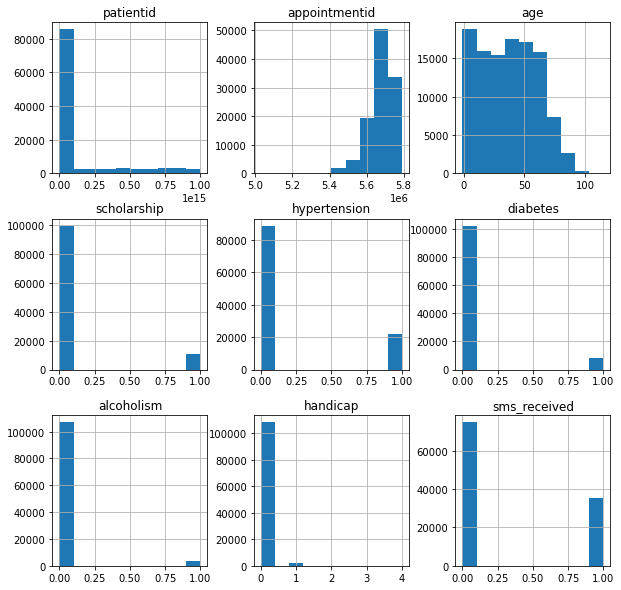

In [173]:
# Plot the data in histograms to find any interesting trend
df.hist(figsize=(10,10));

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

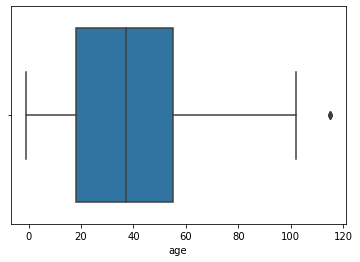

In [174]:
#Plotting the age data to get a sense of the distribution
import seaborn as sns

sns.boxplot(df.age)
plt.show

The purpose of plotting the histogram and boxplot charts is to help us gain a preliminary understanding for the data types in our dataframe.

In [175]:
# Filter for patients in the dataset with age above 100
df[df['age']>100]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No,Tuesday
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,Thursday
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,Thursday
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,Monday
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,Monday
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No,Thursday
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,Friday


In [176]:
# Filter for patients in the dataset with age below 0
df[df['age']<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,Monday


In [177]:
#Removing the outliers of ages below 0 and above 110 as this may likely have been entered in error
df = df[(df['age']<110) & (df['age']>0)]
df[df['age']>110]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow


> From the data [here](https://en.wikipedia.org/wiki/List_of_the_oldest_people_by_country), there are only a few people in the world above 100 years of age. So, I removed those above 110 from the data set to help curtail outliers. 

In [178]:
# Confirm the patient with age below 0 is not in the dataset
df[df['age']<1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow


In [179]:
# Change the no_show responses in the dataset to binary numbers for ease of use during analysis
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


### Summary

+ After loading the data, the following had to be done to prepare it for further analysis:
    + Checked for missing values across columns
    + Changed the column names
    + Removed any outliers for the age column 
    + Converted AppointmentDay and ScheduledDay columns data from String to DateTime format 

<a id='eda'></a>
## Exploratory Data Analysis

> Here, I utilized statistics and created visualizations with the goal of addressing the various research questions I had highlighted in the Introduction section.

### Create a function, new columns and dataframes to reuse through out my analysis

In [180]:
#create a function to calculate the proportion of certain variables by appointment
def PropByVariable(df, variable, title):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(8,10), autopct='%1.2f%%', fontsize = 14, explode=(0, .08));
    ax.set_title(title + ' (%) (Per appointment)\n', fontsize = 16);
    plt.legend();
    return np.round(df_pie/df.shape[0]*100,2)

In [181]:
# Create dataframe to hold both showed and not showed appointments
df_show = df['no_show'] == 0
df_noshow = df['no_show'] == 1

In [182]:
#Add these as new columns to original dataframe
df['patient_showed'] = df_show
df['patient_noshow'] = df_noshow

In [183]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow,patient_showed,patient_noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,True,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,True,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,True,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,True,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,True,False


In [184]:
# Create show and no_show dataframes to use all through the analysis
shows = df.query('no_show == "0"')

no_shows = df.query('no_show == "1"')

In [185]:
shows.shape

(85305, 17)

In [186]:
no_shows.shape

(21677, 17)

## Question 1: What is the overall appointment of shows versus no shows?

False    79.74
True     20.26
Name: patient_noshow, dtype: float64

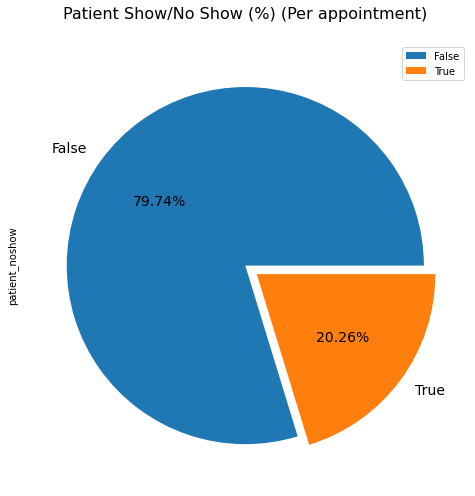

In [187]:
PropByVariable(df, 'patient_noshow', 'Patient Show/No Show')

> #### The pie chart shows that about 80% of the patients with appointments did not show up

## Question 2: Which neighbourhoods have the have the highest number of no shows?

In [188]:
# Find the top 6 neighbourhoods where patients showed up for their appointments
shows_by_hood = shows.groupby("neighbourhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(6)

,neighbourhood,count
37,JARDIM CAMBURI,6154
42,MARIA ORTIZ,4369
58,RESISTÊNCIA,3360
38,JARDIM DA PENHA,3224
10,CENTRO,2590
65,SANTA MARTHA,2552


> #### Top 6 neighbourhoods by show

In [189]:
# Find the top 6 neighbourhoods where patients did not show up for their appointments
noshows_by_hood = no_shows.groupby("neighbourhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
noshows_by_hood.head(6)

,neighbourhood,count
38,JARDIM CAMBURI,1432
43,MARIA ORTIZ,1194
36,ITARARÉ,898
58,RESISTÊNCIA,875
10,CENTRO,692
40,JESUS DE NAZARETH,676


> #### Top 6 neighbourhoods by no shows

## Question 3: Does receiving an sms increase the likelihood of a patient showing up on their appointment date?

In [190]:
# Compute the no show sms count for patients who received sms reminders
noshow_sms_count = no_shows.query('sms_received == 1')
a = noshow_sms_count.shape[0]

In [191]:
a

9568

In [192]:
# Compute the show sms count for patients who received sms
shows_sms_count = shows.query('sms_received == 1')
b = shows_sms_count.shape[0]

In [193]:
b

25016

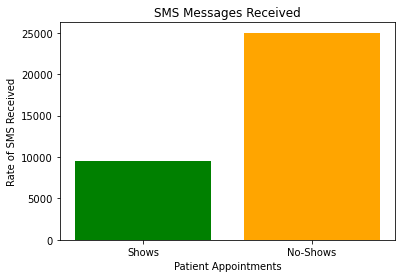

In [194]:
#Plot the data

locations = [1, 2]
heights = [a, b]
labels = ['Shows', 'No-Shows']

bar1 = plt.bar(locations, heights, tick_label=labels, color=['green','orange'])
plt.title('SMS Messages Received')
plt.xlabel('Patient Appointments')
plt.ylabel('Rate of SMS Received')
plt.legend;

> #### The visual representation of shows and no shows when SMS reminders are received.

In [195]:
# Compute the no show sms count for patients who received no sms
noshow_sms_count = no_shows.query('sms_received == 0')
c = noshow_sms_count.shape[0]

# Compute the show sms count for patients who received no sms
shows_sms_count = shows.query('sms_received == 0')
d = shows_sms_count.shape[0]

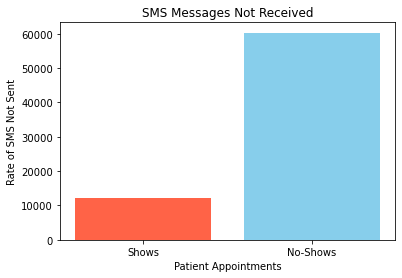

In [196]:
#Plot the data
locations = [1, 2]
heights = [c, d]
labels = ['Shows', 'No-Shows']

bar2 = plt.bar(locations, heights, tick_label=labels, color=['tomato','skyblue'])
plt.title('SMS Messages Not Received')
plt.xlabel('Patient Appointments')
plt.ylabel('Rate of SMS Not Sent');

> #### The visual representation of shows and no shows when SMS reminders/messages are not sent/received

## Question 4: Do no show appointments happen on certain days of the week?

In [197]:
# Compute the no show appointments by days of the week
noshow_mon = no_shows.query('appointment_dow == "Monday"')
noshow_mon = noshow_mon['appointment_dow'].count()

noshow_tue = no_shows.query('appointment_dow == "Tuesday"')
noshow_tue = noshow_tue['appointment_dow'].count()

noshow_wed = no_shows.query('appointment_dow == "Wednesday"')
noshow_wed = noshow_wed['appointment_dow'].count()

noshow_thu = no_shows.query('appointment_dow == "Thursday"')
noshow_thu = noshow_thu['appointment_dow'].count()

noshow_fri = no_shows.query('appointment_dow == "Friday"')
noshow_fri = noshow_fri['appointment_dow'].count()

noshow_sat = no_shows.query('appointment_dow == "Saturday"')
noshow_sat = noshow_sat['appointment_dow'].count()

noshow_sun = no_shows.query('appointment_dow == "Sunday"')
noshow_sun = noshow_sun['appointment_dow'].count()

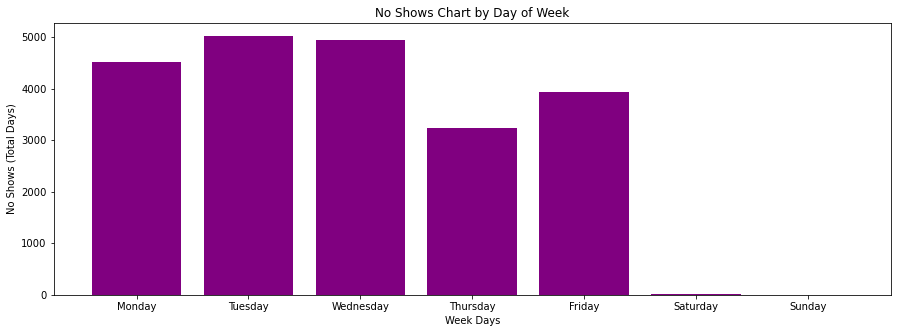

In [198]:
# Plot the data

locations = [1, 2, 3, 4, 5, 6, 7]
heights = [noshow_mon, noshow_tue, noshow_wed, noshow_thu, noshow_fri, noshow_sat, noshow_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='purple')
plt.title('No Shows Chart by Day of Week')
plt.xlabel('Week Days')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(15,5);

>#### We can deduce from the chart above, and it is abundantly clear that Tuesdays followed by Wednesdays had the hightest number of no show appointments.

<a id='conclusions'></a>
## Conclusions

> This analysis is not exhaustive in itself as there are many questions that can still be answered by the data. However, our analysis shows that about 80% of the appointments ended up as no shows. Appointments on Tuesdays had a higher no show rate compared to Thursdays. Overall, appointments at the start of week had a higher no show rate compared to the latter part of a typical week. Also, the data used for this analysis was for a 6-month period. It is possible that with patient data covering a longer period, we may be able to determine if seasonality does impact of patients show rates.

> In addition, considering that the analysis carried out in this report is mostly two dimensional, it may be possible that leveraging multivariate analysis could reveal causality.

<a id='resources'></a>
## Resources

> [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis)<br>
> [Pyplot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)<br>
> [DateTime Function](https://docs.python.org/3/library/datetime.html)<br>

In [199]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1